In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.chdir('C:/Users/Hamza')

In [3]:
df = pd.read_csv('car data.csv')

In [4]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.shape

(301, 9)

In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
Car_Name         301 non-null object
Year             301 non-null int64
Selling_Price    301 non-null float64
Present_Price    301 non-null float64
Kms_Driven       301 non-null int64
Fuel_Type        301 non-null object
Seller_Type      301 non-null object
Transmission     301 non-null object
Owner            301 non-null int64
dtypes: float64(2), int64(3), object(4)
memory usage: 21.2+ KB


In [8]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
#checking distribution of categorical data
print(df.Fuel_Type.value_counts())
print(df.Seller_Type.value_counts())
print(df.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [10]:
#encoding categorical data
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [11]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [12]:
X = df.drop(['Car_Name','Selling_Price'],axis=1)
y = df['Selling_Price']

In [14]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
5    2018           9.83        2071          1            0             0   
6    2015           8.12       18796          0            0             0   
7    2015           8.61       33429          1            0             0   
8    2016           8.89       20273          1            0             0   
9    2015           8.92       42367          1            0             0   
10   2017           3.60        2135          0            0             0   
11   2015          10.38       51000          1            0    

In [15]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
5       9.25
6       6.75
7       6.50
8       8.75
9       7.45
10      2.85
11      6.85
12      7.50
13      6.10
14      2.25
15      7.75
16      7.25
17      7.75
18      3.25
19      2.65
20      2.85
21      4.90
22      4.40
23      2.50
24      2.90
25      3.00
26      4.15
27      6.00
28      1.95
29      7.45
       ...  
271     3.00
272     7.50
273     2.25
274     5.30
275    10.90
276     8.65
277     9.70
278     6.00
279     6.25
280     5.25
281     2.10
282     8.25
283     8.99
284     3.50
285     7.40
286     5.65
287     5.75
288     8.40
289    10.11
290     4.50
291     5.40
292     6.40
293     3.25
294     3.75
295     8.55
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [16]:
from sklearn.model_selection import train_test_split

In [67]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
model = LinearRegression()

In [70]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [82]:
pred1 = model.predict([[2020,14.2,5000,0,1,1,0]])

In [83]:
pred2 = model.predict([[2022,15.25,6000,0,1,1,0]])

In [84]:
pred3 = model.predict([[2012,14.2,15000,0,1,1,0]])

In [85]:
pred4 = model.predict(X_train)

In [80]:
from sklearn import metrics

In [86]:
r2 = metrics.r2_score(y_train,pred4)
r2

0.8805248857244392

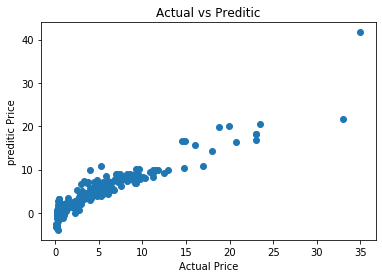

In [90]:
plt.scatter(y_train,pred4)
plt.xlabel('Actual Price')
plt.ylabel('preditic Price')
plt.title('Actual vs Preditic')
plt.show()